In [ ]:
import keras
from keras import backend as K
from keras.layers import Dense, Activation
from keras.optimizers import Adam
from keras.metrics import categorical_crossentropy
from keras.preprocessing.image import ImageDataGenerator
from keras.preprocessing import image
from keras.models import Model
from keras.applications import imagenet_utils
from keras.layers import Dense,GlobalAveragePooling2D, Flatten, Dropout, MaxPooling2D
from keras.applications.mobilenet import preprocess_input
from keras.applications.mobilenet_v2 import MobileNetV2
import numpy as np
from IPython.display import Image
from keras.optimizers import Adam
import tensorflow as tf

In [ ]:
!unzip Dataset.zip
!unzip TestReal.zip

Archive:  Dataset.zip
   creating: Dataset/Katarak/
  inflating: Dataset/Katarak/0.jpg   
  inflating: Dataset/Katarak/1.jpg   
  inflating: Dataset/Katarak/10 (2).jpg  
  inflating: Dataset/Katarak/10.jpg  
  inflating: Dataset/Katarak/100.jpg  
  inflating: Dataset/Katarak/101.jpg  
  inflating: Dataset/Katarak/102 (2).jpg  
  inflating: Dataset/Katarak/102.jpg  
  inflating: Dataset/Katarak/103 (2).jpg  
  inflating: Dataset/Katarak/103.jpg  
  inflating: Dataset/Katarak/104.jpg  
  inflating: Dataset/Katarak/105.jpg  
  inflating: Dataset/Katarak/106 (2).jpg  
  inflating: Dataset/Katarak/106.jpg  
  inflating: Dataset/Katarak/107 (2).jpg  
  inflating: Dataset/Katarak/107.jpg  
  inflating: Dataset/Katarak/108.jpg  
  inflating: Dataset/Katarak/109.jpg  
  inflating: Dataset/Katarak/11 (2).jpg  
  inflating: Dataset/Katarak/11.jpg  
  inflating: Dataset/Katarak/110 (2).jpg  
  inflating: Dataset/Katarak/110.jpg  
  inflating: Dataset/Katarak/111 (2).jpg  
  inflating: Dataset/Kata

In [ ]:
base_model=MobileNetV2(weights="imagenet", include_top=False, input_shape=(224, 224, 3))

last_layer = base_model.get_layer('block_16_project_BN')
last_output = last_layer.output

x=GlobalAveragePooling2D()(last_output)
x=Dense(1024,activation='relu')(x) #dense layer 2
x=Dropout(0.2)(x)
x=Dense(512,activation='relu')(x) #dense layer 3
x=Dropout(0.2)(x)
x=Dense(2,activation='softmax')(x)

model = Model(base_model.input, x)

9406464/9406464 [==============================] - 0s 0us/step


In [ ]:
base_model.summary()
for layer in base_model.layers:
    layer.trainable=False

Model: "mobilenetv2_1.00_224"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 224, 224, 3)]        0         []                            
                                                                                                  
 Conv1 (Conv2D)              (None, 112, 112, 32)         864       ['input_1[0][0]']             
                                                                                                  
 bn_Conv1 (BatchNormalizati  (None, 112, 112, 32)         128       ['Conv1[0][0]']               
 on)                                                                                              
                                                                                                  
 Conv1_relu (ReLU)           (None, 112, 112, 32)         0         ['bn_Conv1[

In [ ]:
train_datagen=ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    height_shift_range=0.2,
    shear_range=0.2,
    validation_split=0.2
) #included in our dependencies

train_generator=train_datagen.flow_from_directory('./Dataset',
                                                 target_size=(224,224),
                                                 color_mode='rgb',
                                                 batch_size=32,
                                                 class_mode='categorical',
                                                 shuffle=True)
val_generator=train_datagen.flow_from_directory('./Dataset',
                                                 target_size=(224,224),
                                                 color_mode='rgb',
                                                 batch_size=32,
                                                 class_mode='categorical',
                                                 shuffle=True,
                                                 subset='validation')

Found 759 images belonging to 2 classes.
Found 151 images belonging to 2 classes.


In [ ]:
class MyThresholdCallback(tf.keras.callbacks.Callback):
    def __init__(self, threshold):
        super(MyThresholdCallback, self).__init__()
        self.threshold = threshold

    def on_epoch_end(self, epoch, logs=None):
        accuracy = logs["val_accuracy"]
        loss = logs["val_loss"]
        if accuracy >= self.threshold and loss <= self.threshold:
            self.model.stop_training = True

In [ ]:
callback=MyThresholdCallback(threshold=0.9)

In [ ]:
model.compile(optimizer='Adam',loss='categorical_crossentropy',metrics=['accuracy'])

model.fit(train_generator,
          epochs=20,
          validation_data=val_generator)

Epoch 1/20
24/24 [==============================] - 56s 2s/step - loss: 0.5680 - accuracy: 0.7813 - val_loss: 0.1038 - val_accuracy: 0.9735
Epoch 2/20
24/24 [==============================] - 55s 2s/step - loss: 0.1058 - accuracy: 0.9578 - val_loss: 0.0347 - val_accuracy: 0.9868
Epoch 3/20
24/24 [==============================] - 49s 2s/step - loss: 0.0727 - accuracy: 0.9697 - val_loss: 0.0243 - val_accuracy: 0.9934
Epoch 4/20
24/24 [==============================] - 51s 2s/step - loss: 0.0372 - accuracy: 0.9881 - val_loss: 0.0112 - val_accuracy: 1.0000
Epoch 5/20
24/24 [==============================] - 50s 2s/step - loss: 0.0391 - accuracy: 0.9829 - val_loss: 0.0369 - val_accuracy: 0.9801
Epoch 6/20
24/24 [==============================] - 45s 2s/step - loss: 0.0434 - accuracy: 0.9895 - val_loss: 0.0289 - val_accuracy: 0.9868
Epoch 7/20
24/24 [==============================] - 49s 2s/step - loss: 0.0469 - accuracy: 0.9842 - val_loss: 0.0338 - val_accuracy: 0.9934
Epoch 8/20
24/24 [==

In [ ]:
model.evaluate(val_generator)

5/5 [==============================] - 11s 2s/step - loss: 0.0032 - accuracy: 1.0000


[0.003202572464942932, 1.0]

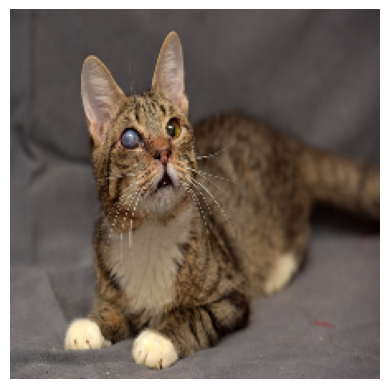

1/1 [==============================] - 0s 65ms/step
Prediksi: Katarak


In [ ]:
from PIL import ImageFile
ImageFile.LOAD_TRUNCATED_IMAGES = True
import numpy as np
import matplotlib.pyplot as plt

def load_image(img_path, show=True):

    img = image.load_img(img_path, target_size=(224, 224))
    img_tensor = image.img_to_array(img)
    img_tensor = np.expand_dims(img_tensor, axis=0)
    img_tensor /= 255.

    if show:
        plt.imshow(img_tensor[0])
        plt.axis('off')
        plt.show()

    return img_tensor

img_path = 'TestReal/3.jpg'
new_image = load_image(img_path)

pred = model.predict(new_image)

# Memilih label berdasarkan nilai prediksi tertinggi
pred_label = "Katarak" if np.argmax(pred, axis=1) == 0 else "Normal"

print("Prediksi:", pred_label)

In [ ]:
import pathlib

model.save("model.h5")

# Convert the model.
converter = tf.lite.TFLiteConverter.from_keras_model(model) # path to the SavedModel directory
converter.optimizations = [tf.lite.Optimize.DEFAULT]
# converter.target_spec.supported_ops = [tf.lite.OpsSet.TFLITE_BUILTINS_INT8]
tflite_model = converter.convert()

# tflite_model_file = pathlib.Path("/content/tflite")
# tflite_model_file.write_bytes(tflite_model)

# Save the model.
with open('model.tflite', 'wb') as f:
  f.write(tflite_model)